<a href="https://colab.research.google.com/github/projectb14/prediction-of-diabetes-using-machine-learning/blob/main/DETECTION_AD_PREDICT_DIABETES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**importing the dependencies**

In [ ]:
#including the libraries needed
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


**data collection and analysis**

In [ ]:
#loading diabetes dataset to a pandas dataframe
diabetes_dataset=pd.read_csv('/content/diabetes.csv')
#here it store the data set in variable diabetes_dataset.
#printing first 5 row of data set
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#number of column and row in data set
diabetes_dataset.shape

(768, 9)

In [ ]:
#getting the statistical measure of data 
diabetes_dataset.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


DATA VISUALIZATION

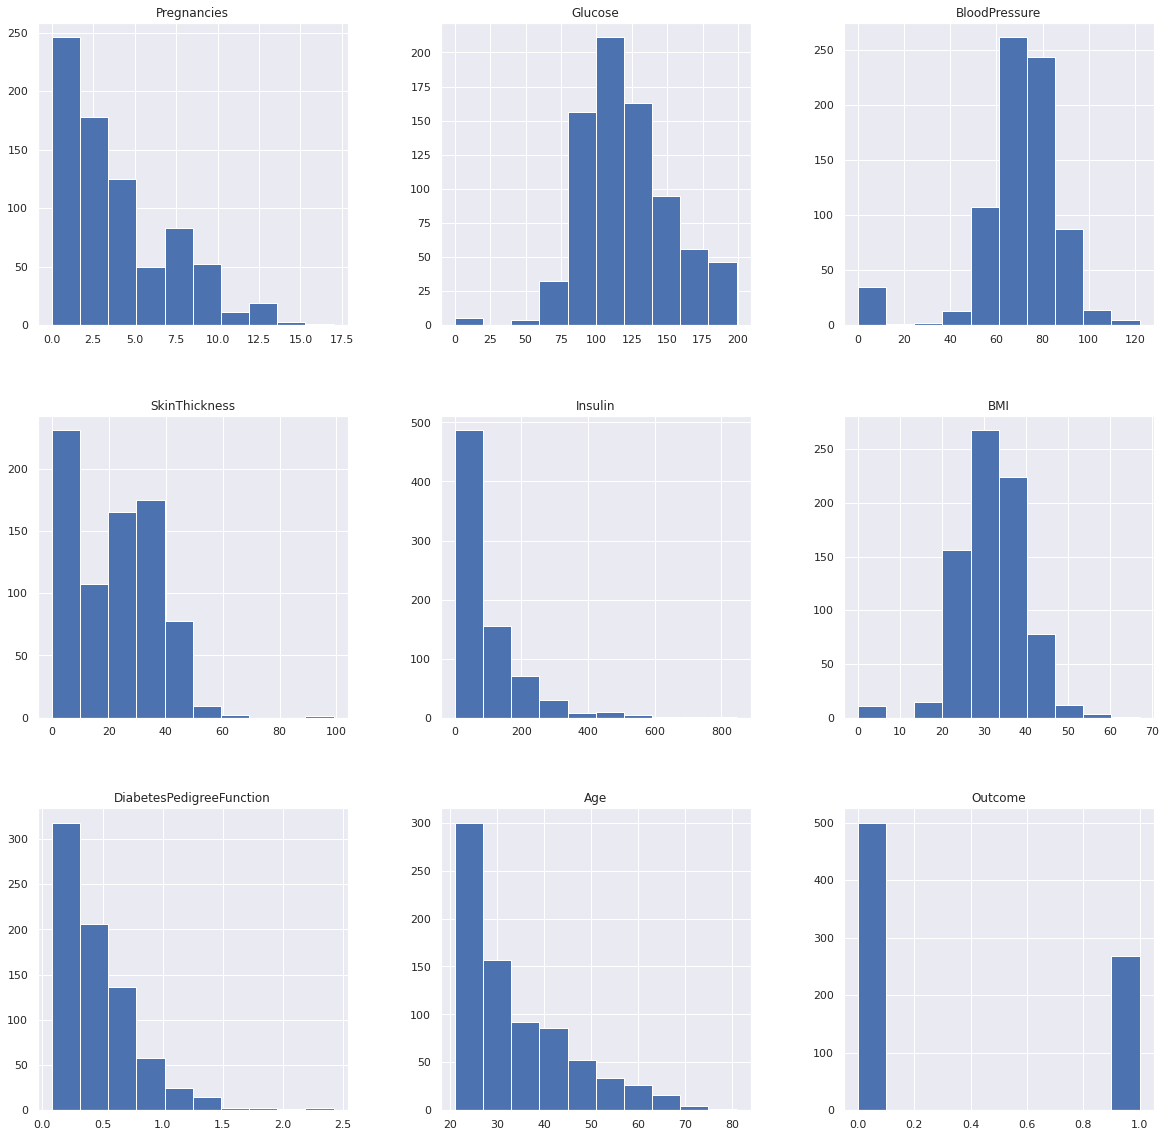

In [ ]:
p = diabetes_dataset.hist(figsize = (20,20))

0    500
1    268
Name: Outcome, dtype: int64


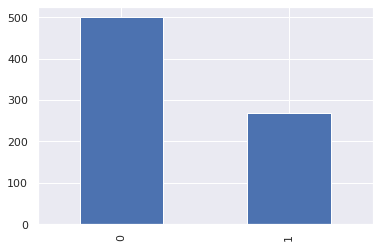

In [ ]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = diabetes_dataset["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_dataset.Outcome.value_counts())
p=diabetes_dataset.Outcome.value_counts().plot(kind="bar")

0 --> Non-Diabetic

1 --> Diabetic

Here from the above visualization it is clearly visible that our dataset is completely imbalanced in fact the number of patients who are diabetic is half of the patients who are non-diabetic.

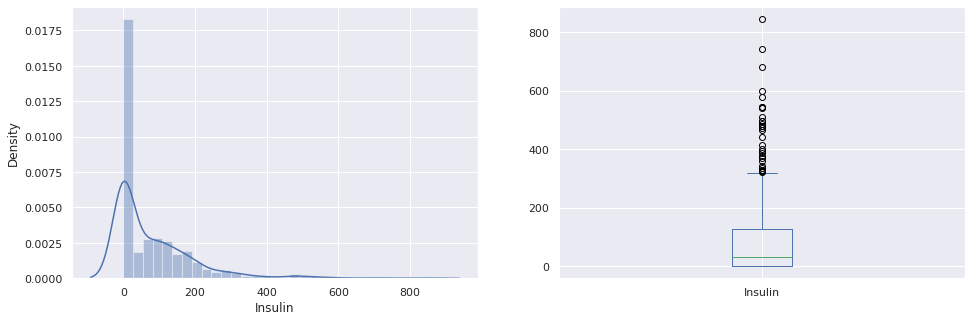

In [ ]:
plt.subplot(121), sns.distplot(diabetes_dataset['Insulin'])
plt.subplot(122), diabetes_dataset['Insulin'].plot.box(figsize=(16,5))
plt.show()

That’s how Distplot can be helpful where one will able to see the distribution of the data as well as with the help of boxplot one can see the outliers in that column and other information too which can be derived by the box and whiskers plot.

Correlation between all the features

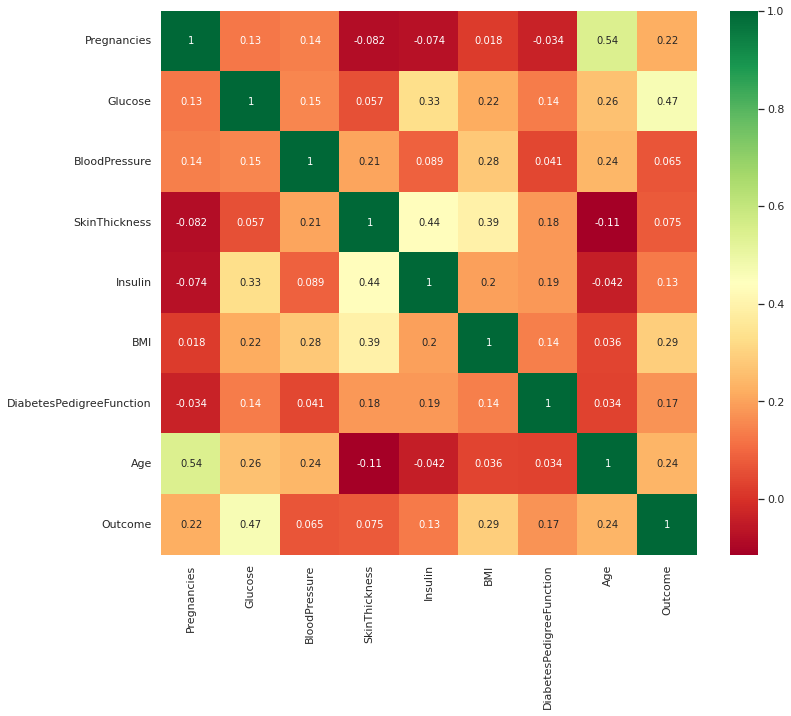

In [ ]:
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(diabetes_dataset.corr(), annot=True,cmap ='RdYlGn')

In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


**Data Standardization**

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)
StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


**Train Test Split**``

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


**Training the Model**

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

**MODEL EVALUATION**

ACCURACY SCORE

In [ ]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7866449511400652


In [ ]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


**Making a Predictive System**

In [ ]:

input_data = (5,160,72,19,175,25.8,0.587,30)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.22388954  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723 -0.27575966]]
[1]
The person is diabetic


**RANDOM FOREST**

Building the model using RandomForest

In [ ]:
X = diabetes_dataset.drop('Outcome', axis=1)
y = diabetes_dataset['Outcome']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,
                                                    random_state=7)

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

In [ ]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


Output: Accuracy = 1.0

So here we can see that on the training dataset our model is overfitted.

In [ ]:
Getting the accuracy score for Random Forest

In [ ]:
from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7677165354330708


Classification report and confusion matrix of random forest model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[136  26]
 [ 33  59]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       162
           1       0.69      0.64      0.67        92

    accuracy                           0.77       254
   macro avg       0.75      0.74      0.74       254
weighted avg       0.76      0.77      0.77       254



Decision Tree
Building the model using DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

Getting the accuracy score for Decision Tree

In [ ]:
from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.7086614173228346


In [ ]:
Classification report and confusion matrix of the decision tree model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[130  32]
 [ 42  50]]
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       162
           1       0.61      0.54      0.57        92

    accuracy                           0.71       254
   macro avg       0.68      0.67      0.68       254
weighted avg       0.70      0.71      0.70       254



### **The Conclusion from Model Building**
Therefore Random forest is the best model for this prediction since it has an accuracy_score of 0.76.

Feature Importance
Knowing about the feature importance is quite necessary as it shows that how much weightage each feature provides in the model building phase.

In [ ]:
Getting feature importances

In [ ]:
rfc.feature_importances_

array([0.08156856, 0.24973935, 0.09013298, 0.07509683, 0.0746644 ,
       0.16823953, 0.12471414, 0.13584422])


Plotting feature importances

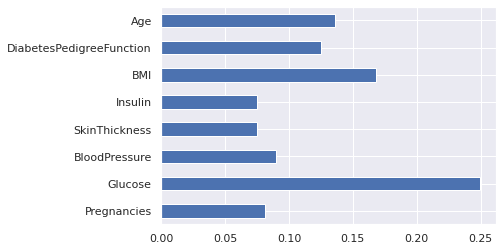

In [ ]:
(pd.Series(rfc.feature_importances_, index=X.columns).plot(kind='barh'))


Here from the above graph, it is clearly visible that Glucose as a feature is the most important in this dataset


### **CONCLUSIONS**

After using all these patient records, we are able to build a machine learning model (random forest – best one) to accurately predict whether or not the patients in the dataset have diabetes or not along with that we were able to draw some insights from the data via data analysis and visualization.